# Линейная регрессия
Написание своего класса линейной регрессии

Датасетом пингвинов: [датасет](https://drive.google.com/file/d/1IxN3dR1D6W_hUI656ghr2T3HcolgLsMF/view?usp=share_link)

![picture](https://imgur.com/orZWHly.png)

## Импорт библиотек и загрузка данных

Импортируем нужные библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузим датасет (так же, как мы это делали на семинаре):

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,вид,остров,длина клюва,ширина клюва,длина плавника,масса тела,пол
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
3,0,2,36.7,19.3,193.0,3450.0,0
4,0,2,39.3,20.6,190.0,3650.0,1


In [15]:
X = data.drop(columns="длина плавника")
Y = data["длина плавника"]

In [17]:
Ones = np.ones(X.shape[0])
# X = np.column_stack([Ones,np.array(X)])
np.array(X)

array([[0.00e+00, 2.00e+00, 3.91e+01, 1.87e+01, 3.75e+03, 1.00e+00],
       [0.00e+00, 2.00e+00, 3.95e+01, 1.74e+01, 3.80e+03, 0.00e+00],
       [0.00e+00, 2.00e+00, 4.03e+01, 1.80e+01, 3.25e+03, 0.00e+00],
       ...,
       [2.00e+00, 0.00e+00, 5.04e+01, 1.57e+01, 5.75e+03, 1.00e+00],
       [2.00e+00, 0.00e+00, 4.52e+01, 1.48e+01, 5.20e+03, 0.00e+00],
       [2.00e+00, 0.00e+00, 4.99e+01, 1.61e+01, 5.40e+03, 1.00e+00]])

Датасет содержит 7 признаков:

- **вид**: вид пингвина. Всего их три разных:
  - 0: Adelie
  - 1: Chinstrap
  - 2: Gento
- **остров**: oстров, на котором обитает пингвин. Всего их три разных:
  - 0: Biscoe  
  - 1: Dream
  - 2: Torgersen
- **длина клюва**: длина клюва пингвина в миллиметрах;
- **ширина клюва**: ширина клюва пингвина в миллиметрах;
- **длина плавника**: длина плавника пингвина в миллиметрах;
- **масса тела**:	масса тела пингвина в граммах;
- **пол**: пол пингвина. Всго их два:
  - 0: самка
  - 1: самец





## Реализация класса линейной регрессии

Несколько комментариев к заданию:
- для каждого метода класса (fit, predict) описано, что этот метод принимает на вход и какой функционал реализует. По сути, fit — это аналог метода fit модели линейной регресси из sklearn, predict — аналог метода predict модели линейной регресси из sklearn;
- в методе fit при полечении коэффициентов линейной регрессии вам нужно получить две переменные: self.coef_ и self.intercept_. В self.coef_ должен получиться массив коэффициентов, которые модель поставила в соответствие признакам датасета. В self.intercept_ должно получиться одно число — коэффициент-свободный член, который выучила модель. По сути, self.coef_ и self.intercept_ должны быть аналогами этих же переменных модели Linear Regression из sklearn.

Алгоритм реализации метода fit:
1. Перевести X и y в numpy array (для удобства). Это уже реализовано;
2. Добавить к Х первый столбец из единиц. Подсказка: чтобы это сделать, удобно использовать np.hstack. Подумайте, как именно;
3. Получить массив коэффициентов k по формуле, которую мы рассматривали в теоретическом видео (2 видео, 16 слайд)
4. Разбить полученный массив коэффициентов k на self.coef_ и self.intercept_

Алгоритм реализации метода predict:
1. Получить значения y_pred, используя значения выученных коэффициентов и входящих признаков Х по формуле, которую мы рассматривали в теоретическом видео (2 видео, 16 слайд)

## Тестирование класса линейной регрессии

Давайте протестируем наш самописный класс MyLinearRegression, чтобы убедиться, что мы написали его верно. Обязательно протестируйте ваш класс перед отправкой кода на Степик!

### Датасет с одним признаком

Сначала протестируем случай, когда у нас всего один признак в данных. Так же, как и на практическом занятии, заведем переменные Х и y, и присвоим Х один из столбцов нашего датасета пингвинов. В этот раз давайте будем пытаться предсказывать длину клюва пингвина по его длине плавника.

In [23]:
X = data[['длина плавника']]
y = data['длина клюва']

Разобьем Х и y на train и test:

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

И визуализируем точки обучающей выборки:

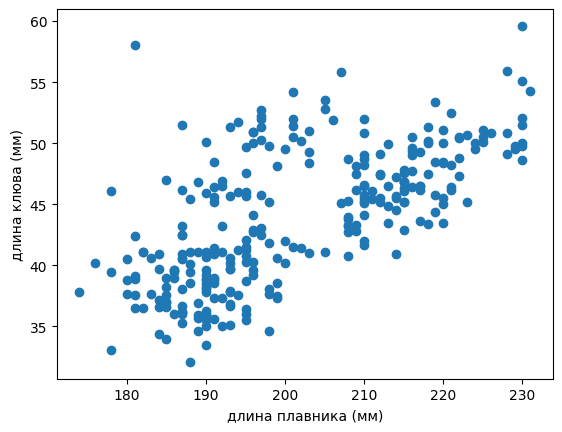

In [33]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# подпишем оси
plt.xlabel('длина плавника (мм)');
plt.ylabel('длина клюва (мм)');

plt.show()

Отлично. Теперь объявим и обучим нашу линейную регрессию:

In [82]:
class MyLinearRegression:

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None

    def _add_constants(self, X):
        return np.column_stack([np.ones(X.shape[0]), X])


    def fit(self, X, y):
        '''
        входящие параметры:
            X: матрица размера (n, f), где n — количество элементов датасета,
               f — количество признаков
            y: массив размера (n, ), где n — количество элементов датасета
        '''
        X = np.array(X)
        y = np.array(y)

        X_new = self._add_constants(X)

        right = X_new.T @ y
        left = np.linalg.inv(X_new.T @ X_new)
        self.coef_ = left @ right

        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]


    def predict(self, X):
        X = self._add_constants(X)
        y_pred =X @ np.append(self.intercept_, self.coef_)

        return y_pred

In [83]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)

И посмотрим, какие у нашей линейной регрессии получились коэффициенты:

In [84]:
my_lr.coef_, my_lr.intercept_

(array([0.25771094]), -7.918373957669907)

Теперь мы можем визуализировать прямую, которую описывает наша линейная регрессия. Делаем это точно тем же кодом, что на практическом занятии. Убедитесь, что ваша линейная регрессия строит прямую, которая адекватно описывает точки (т.е. похожа на правильную).

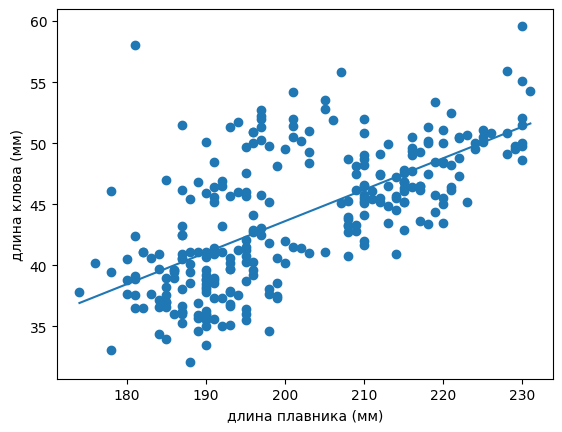

In [85]:
# визуализируем точки обучающей выборки
plt.scatter(X_train, y_train)

# визуализируем прямую, которую выражает линейная регрессия
# y = coef_*x_1 + intercept_
def f_line(x):
    return  my_lr.coef_*x + my_lr.intercept_

x = [np.min(X_train), np.max(X_train)]
y = f_line(x)
plt.plot(x, y)

plt.xlabel('длина плавника (мм)')
plt.ylabel('длина клюва (мм)')

plt.show()

### Сравнение с LinearRegression из sklearn

In [86]:
from sklearn.linear_model import LinearRegression

Объявляем модель, обучаем и получаем коэффициенты:

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

Еще раз выведем коэффициенты нашей самописной модели, чтобы сравнить их с теми, что выдает модель из sklearn:

In [ ]:
my_lr.coef_, my_lr.intercept_

In [ ]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

Если ошибок нет, то поздравляю: у вашей линейной регрессии правильно работает метод fit на датасете, в котором один признак =). Проверим теперь работу метода predict. Вызовем predict у my_lr и у lr и сравним ответы:

In [ ]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"

Если ячейка отработала без ошибок, поздравляю: ваша линейная регрессия полностью правильно работает на датасете, в котором один признак!
    
Теперь давайте проверим, что самописная модель также работает на данных, в которых несколько признаков:

### Датасет с несколькими признаками

In [ ]:
data.head()

Давайте обучим нашу модель на данных, в которых будут все 6 признаков (все, кроме "длина клюва", которая у нас целевая переменная).

In [ ]:
y = data['длина клюва']
X = data.drop(columns=['длина клюва'])

Поделим данные на train и test:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

Объявим и обучим самописную линейную регрессию на train части:

In [ ]:
my_lr = MyLinearRegression()
my_lr.fit(X_train, y_train)
my_lr.coef_, my_lr.intercept_

Также объявим и обучим модель из sklearn, чтобы сравнить их:

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.coef_, lr.intercept_

Проверка, что coef_ и intercept_ совпадают:

In [ ]:
assert np.allclose(my_lr.coef_, lr.coef_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"
assert np.allclose(my_lr.intercept_, lr.intercept_), "Ошибка: coef_ вашей модели не совпадает с coef_ модели из sklearn!"

И также проверим, что правильно работает метод predict:

In [ ]:
my_y_pred = my_lr.predict(X_test)
y_pred = lr.predict(X_test)

assert np.allclose(my_y_pred, y_pred), "Ошибка: метод predict выдает неверные результаты!"